In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
poll_data = pd.read_csv("./data/mlcourse_open_first_survey_parsed.csv", index_col="id")

In [10]:
poll_data.head(2)

,time,intro,jupyter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [6]:
poll_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 3215
Data columns (total 14 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                    --------------  -----  
 0   Timestamp                                                                                                                                 2944 non-null   object 
 1   Представьтесь в 2-3 фразах                                                                                                                2944 non-null   object 
 2   Работали ли Вы с Jupyter notebooks?                                                                                                       2931 non-null   object 
 3   Что Вы ждете от курса?                               

In [7]:
poll_data.shape

(2944, 14)

In [8]:
rename_dic = dict(
    zip(
        poll_data.columns,
        [
            "time",
            "intro",
            "jupyter",
            "expect",
            "sport",
            "personal",
            "math_level",
            "quest1",
            "quest2",
            "quest3",
            "fib_gen",
            "python",
            "github",
            "movie",
        ],
    )
)

In [9]:
poll_data.rename(columns=rename_dic, inplace=True)

In [11]:
poll_data.head(2)

,time,intro,jupyter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [13]:
poll_data['jupyter'].value_counts().head()

Да                                                              2071
Нет                                                              766
немного                                                            7
Немного                                                            3
Немного,  недавно начал проходить курс от яндекса на курсоре       2
Name: jupyter, dtype: int64

In [21]:
jupyter_levels = poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).fillna(2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


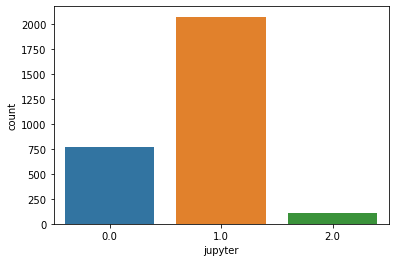

In [22]:
sns.countplot(jupyter_levels);

In [24]:
poll_data.sport.value_counts().head()

Футбол       197
футбол       113
Баскетбол    113
Плавание      94
Хоккей        66
Name: sport, dtype: int64

In [35]:
(poll_data['quest3']==2).dropna().sum() / (poll_data['quest3'][~poll_data['quest3'].isnull()].shape[0])

0.9244036697247706

In [36]:
poll_data['quest3'][~poll_data['quest3'].isnull()].shape[0]

2725

In [44]:
all_words = np.concatenate(poll_data["intro"].apply(lambda s: s.strip().split()).values)

In [60]:
pd.Series(list(all_words)).value_counts()

в                  1235
и                   734
на                  409
по                  283
Студент             279
                   ... 
направления,          1
нетехнического        1
Биоинформатик,        1
права.                1
онлайн-банкинг.       1
Length: 8294, dtype: int64

In [45]:
len(all_words)

26533

In [48]:
import nltk

In [55]:
from nltk.corpus import stopwords

In [66]:
nltk.corpus.stopwords.words("russian")[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [65]:
words_series = pd.Series(list(all_words))
words_series[~words_series.isin(nltk.corpus.stopwords.words("russian"))].value_counts().head(10)

Студент     279
Работаю     201
курса       187
данных      178
Data        173
Я           166
работаю     157
data        130
машинным    123
ML          122
dtype: int64